# Building a machine learning pipeline

***Step 1:***
- Conctenate several csv files into one csv file and match the officer ID column

In [49]:
import os
import glob
import pandas as pd
import numpy as np
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:/algorithmic_hiring/input_data')

import warnings
warnings.filterwarnings('ignore')

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['combined_csv.csv',
 'complaints.csv',
 'officer_shooting.csv',
 'UseOfForce.csv']

In [4]:
# Combining all the csv files
df = pd.concat([pd.read_csv(f) for f in all_filenames])
df

C:\Users\liuis\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (7,8,9,10,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,id,occurredDate,division,district,shift,beat,serviceType,source,allegationType,allegation,...,residentCondition,officerCondition,useOfForceReason,officerForceType,arrestMade,arrestCharges,residentInjured,residentHospitalized,officerInjured,officerHospitalized
0,a25a332352fb0bd97f021e0629e910a0,2015-09-14 00:00:00,Operations Division,Downtown District,DT Middle Shift,NaN,NaN,CPCO (Informal),Citizen Interaction,"Rude, Demeaning, or Affronting Language",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a25a332352fb0bd97f021e0629e910a0,2015-09-14 00:00:00,Operations Division,Downtown District,DT Middle Shift,NaN,NaN,CPCO (Informal),Citizen Interaction,Failure to Make a Report When Approached by a ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73c1770e3517d1ee3a8cd79553818994,2015-09-15 00:00:00,Operations Division,Southeast District,SE Day Tactical Shift,NaN,Not Applicable,CPCO (Informal),Vehicle Operation,Aggressive or Unsafe Driving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24f09e6c595b7f083bc73c543d30dad0,2015-09-16 00:00:00,Operations Division,East District,ED Middle Shift,NaN,Self-Initiated Activity,CPCO (Informal),Citizen Interaction,"Rude, Demeaning, or Affronting Language",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,618db71f93906d54ba72c707c43c75d9,2015-09-15 00:00:00,Operations Division,Northwest District,NW Late Shift,NaN,Call for Service,CPCO (Informal),Citizen Interaction,Failure to Make a Report When Approached by a ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16821,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Handcuffing,True,NaN,True,True,False,False
16822,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Knee Strike,True,NaN,True,True,False,False
16823,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Joint/Pressure,True,NaN,True,True,False,False
16824,81498210c84022bccb32701a28fed068,2019-06-28 00:00:00,Operations Division,East District,ED Late Shift,NaN,Traffic Stop,NaN,NaN,NaN,...,Minor Scrapes,No injuries noted or visible,Non-Compliant,Physical-Weight Leverage,True,NaN,True,True,False,False


***Feature selection***

In [5]:
temp_df = df.drop(['id','division','district','shift','beat','serviceType'
         ,'source','allegation','residentCondition','officerCondition'
         ,'arrestMade','arrestCharges','residentInjured','residentHospitalized'
         ,'officerInjured','officerHospitalized','residentRace','finding','residentSex'
         ,'residentAge','officerAge','officerYearsOfService'
         ,'disposition','occurredDate'],axis=1)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType
0,Citizen Interaction,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN
1,Citizen Interaction,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN
2,Vehicle Operation,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN
3,Citizen Interaction,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN
4,Citizen Interaction,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16821,NaN,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing
16822,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike
16823,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure
16824,NaN,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage


***Converting values to 0 or 1
   - Encoding these categorical values
   - Unable to use HotEncoders due to special conditions for police brutality
   - Only use OneHotEncoder for gender and race***

In [6]:
temp_df['allegationType'].unique()

array(['Citizen Interaction', 'Vehicle Operation',
       'Substandard Performance', 'Breach of Discipline',
       'Bias-Based Profiling', 'Use of Force', 'Equipment and Uniforms',
       'Neglect of Duty', nan, 'Detention/Arrest', 'Search/Seizure',
       'Animal Incidents', 'Off-Duty Employment', 'Field Operations',
       'Civilian Employees', 'Prisoner Handling/Trans.',
       'Conduct Unbecoming', 'Violation of Any Rule',
       'Investigative Procedures', 'Violation of Any Law',
       'Supv. Responsibilities', 'Info. Security/Access',
       'Failure to Cooperate', 'Unit or Section SOPs'], dtype=object)

In [7]:
temp_df['allegationType'] = temp_df.allegationType.map({'Citizen Interaction':1, 'Vehicle Operation':1, 'Citizen Interaction':1, 'Vehicle Operation':1,
                                              'Substandard Performance':1, 'Breach of Discipline':1,
                                              'Bias-Based Profiling':1, 'Use of Force':1, 'Equipment and Uniforms':1,
                                              'Neglect of Duty':1, 'Detention/Arrest':1, 'Search/Seizure':1,
                                              'Animal Incidents':1, 'Off-Duty Employment':1, 'Field Operations':1,
                                              'Civilian Employees':1, 'Prisoner Handling/Trans.':1,
                                              'Conduct Unbecoming':1, 'Violation of Any Rule':1,
                                              'Investigative Procedures':1, 'Violation of Any Law':1,
                                              'Supv. Responsibilities':1, 'Info. Security/Access':1,
                                              'Failure to Cooperate':1, 'Unit or Section SOPs':1})
temp_df['allegationType']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16821    NaN
16822    NaN
16823    NaN
16824    NaN
16825    NaN
Name: allegationType, Length: 37690, dtype: float64

In [8]:
temp_df['allegationType'] = temp_df['allegationType'].fillna(0)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage


In [9]:
temp_df['useOfForceReason'].unique()

array([nan, 'Fleeing', 'Combative Suspect', 'Resisting Arrest',
       'Non-Compliant', 'Assaulting Citizen(s)', 'Assaulting Officer(s)',
       'Canine Incident'], dtype=object)

In [10]:
temp_df['officerForceType'].value_counts()

Physical-Handcuffing                6136
Physical-Weight Leverage            5814
Physical-Take Down                  4362
Less Lethal-Taser                   2928
Physical-Joint/Pressure             2008
Physical-Other                      1878
Physical-Leg Sweep                  1428
Physical-Knee Strike                1302
Physical-Fist Strike                 966
Less Lethal-CS/OC                    876
Canine Bite                          812
Physical-Palm Strike                 500
Physical-Hands, Fist, Feet           402
Physical-Kick                        374
Physical-Elbow Strike                236
Less Lethal-Bean Bag                 184
Less Lethal-Pepperball               176
Less Lethal-Baton                    114
Less Lethal-CS Fogger                104
Less Lethal-Other                     92
Less Lethal-Burning CS                82
Less Lethal-Personal CS/OC spray      70
Lethal-Handgun                        44
Less Lethal-Clearout OC               24
Less Lethal-Bps 

For reasons such as fleeing, combative suspect, resisting arrest, officers are not allowed to use lethal weapons and riot gears such as CS grenades, Fogger, Baton, etc.

In [11]:
conditions = [
    # Fleeing 19
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Pepperball'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Personal CS/OC spray'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Baton'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Bean Bag'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-BPS Gas'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Pepperball'), 
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerForceType'].eq('Less Lethal-Taser'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Fleeing') & temp_df['officerWeaponUsed'].eq('IMPD - Shotgun'),
    # Combative suspect 15
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerWeaponUsed'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Combative Suspect') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    # Resisting Arrest 15
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
    # Non Compliant 15
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Personal Patrol Rifle'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Duty Handgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS/OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('IMPD - Shotgun'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Flash Bang'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Grenade'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-CS Fogger'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Clearout OC'),
    temp_df['useOfForceReason'].eq('Resisting Arrest') & temp_df['officerForceType'].eq('Less Lethal-Burning CS'),
]
choices = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
temp_df['police_brutality'] = np.select(conditions, choices)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,officerWeaponUsed,useOfForceReason,officerForceType,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,NaN,NaN,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,NaN,NaN,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,NaN,NaN,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,NaN,NaN,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,NaN,Non-Compliant,Physical-Handcuffing,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Knee Strike,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Joint/Pressure,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,NaN,Non-Compliant,Physical-Weight Leverage,0


In [12]:
temp_df['allegationType'].value_counts()

0.0    34168
1.0     3522
Name: allegationType, dtype: int64

In [13]:
temp_df['police_brutality'].value_counts()

0    36590
1     1100
Name: police_brutality, dtype: int64

In [14]:
temp_df = temp_df.drop(['useOfForceReason', 'officerForceType', 'officerWeaponUsed'], axis=1)
temp_df

,allegationType,officerRace,officerSex,officerIdentifier,residentWeaponUsed,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0


In [15]:
temp_df = temp_df.rename(columns={'allegationType': 'receivedComplaint(s)', 'residentWeaponUsed':'involvedInShooting'})

In [16]:
temp_df['involvedInShooting']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
16821    NaN
16822    NaN
16823    NaN
16824    NaN
16825    NaN
Name: involvedInShooting, Length: 37690, dtype: object

In [17]:
temp_df['involvedInShooting'] = temp_df.involvedInShooting.map({'Handgun':1, 'Misc Weapon':1, 'Unarmed':0, 'Knife':1,
                                                                'Rifle':1})
temp_df

,receivedComplaint(s),officerRace,officerSex,officerIdentifier,involvedInShooting,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,NaN,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,NaN,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,NaN,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,NaN,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,NaN,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,NaN,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,NaN,0


In [18]:
temp_df['involvedInShooting'] = temp_df['involvedInShooting'].replace(np.nan, 0)
temp_df

,receivedComplaint(s),officerRace,officerSex,officerIdentifier,involvedInShooting,police_brutality
0,1.0,Black,Female,D2551d43b19ebffa7bd2ee6527246459,0.0,0
1,1.0,White,Male,9ccd97e1f4a3ff326f52ea6118ad10cf,0.0,0
2,1.0,White,Female,86b3db6862d5c9c52be8c3a18dbdd35b,0.0,0
3,1.0,White,Male,26e7ffb946a061efe6f9ce0376b5fec4,0.0,0
4,1.0,Black,Male,Dd58d505aaff5d539d5936329f0fbbae,0.0,0
...,...,...,...,...,...,...
16821,0.0,Other,Male,4f5b0245132a579c404103a1e921faad,0.0,0
16822,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16823,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16824,0.0,White,Female,df3f266d261dd9ae81516797fae2fdeb,0.0,0


In [19]:
temp_df.to_csv('output.csv', index=False)

In [21]:
temp_df['involvedInShooting'].value_counts()

0.0    37622
1.0       68
Name: involvedInShooting, dtype: int64

In [22]:
temp_df['receivedComplaint(s)'].value_counts()

0.0    34168
1.0     3522
Name: receivedComplaint(s), dtype: int64

***Hot encoding race and gender. Converting them to integer values***

In [36]:
import category_encoders as ce

In [39]:
OHE = ce,OneHotEncoder(cols=['officerRace', 'officerSex'], use_cat_names=True)

,receivedComplaint(s),officerRace_Black,officerRace_White,officerRace_Hispanic,officerRace_nan,officerRace_Other,officerRace_Asian,officerSex_Female,officerSex_Male,officerSex_nan,officerIdentifier,involvedInShooting,police_brutality
0,1.0,1,0,0,0,0,0,1,0,0,D2551d43b19ebffa7bd2ee6527246459,0.0,0
1,1.0,0,1,0,0,0,0,0,1,0,9ccd97e1f4a3ff326f52ea6118ad10cf,0.0,0
2,1.0,0,1,0,0,0,0,1,0,0,86b3db6862d5c9c52be8c3a18dbdd35b,0.0,0
3,1.0,0,1,0,0,0,0,0,1,0,26e7ffb946a061efe6f9ce0376b5fec4,0.0,0
4,1.0,1,0,0,0,0,0,0,1,0,Dd58d505aaff5d539d5936329f0fbbae,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16821,0.0,0,0,0,0,1,0,0,1,0,4f5b0245132a579c404103a1e921faad,0.0,0
16822,0.0,0,1,0,0,0,0,1,0,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16823,0.0,0,1,0,0,0,0,1,0,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16824,0.0,0,1,0,0,0,0,1,0,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0


In [73]:
temp_df

,receivedComplaint(s),officerRace_Black,officerRace_White,officerRace_Hispanic,officerRace_Other,officerRace_Asian,officerSex_Female,officerSex_Male,officerIdentifier,involvedInShooting,police_brutality
0,1.0,1,0,0,0,0,1,0,D2551d43b19ebffa7bd2ee6527246459,0.0,0
1,1.0,0,1,0,0,0,0,1,9ccd97e1f4a3ff326f52ea6118ad10cf,0.0,0
2,1.0,0,1,0,0,0,1,0,86b3db6862d5c9c52be8c3a18dbdd35b,0.0,0
3,1.0,0,1,0,0,0,0,1,26e7ffb946a061efe6f9ce0376b5fec4,0.0,0
4,1.0,1,0,0,0,0,0,1,Dd58d505aaff5d539d5936329f0fbbae,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16821,0.0,0,0,0,1,0,0,1,4f5b0245132a579c404103a1e921faad,0.0,0
16822,0.0,0,1,0,0,0,1,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16823,0.0,0,1,0,0,0,1,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0
16824,0.0,0,1,0,0,0,1,0,df3f266d261dd9ae81516797fae2fdeb,0.0,0


***Further data analysis and exploration***
- Descriptive statistics

In [59]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [60]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37690 entries, 0 to 16825
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   receivedComplaint(s)  37690 non-null  float64
 1   officerRace_Black     37690 non-null  int64  
 2   officerRace_White     37690 non-null  int64  
 3   officerRace_Hispanic  37690 non-null  int64  
 4   officerRace_Other     37690 non-null  int64  
 5   officerRace_Asian     37690 non-null  int64  
 6   officerSex_Female     37690 non-null  int64  
 7   officerSex_Male       37690 non-null  int64  
 8   officerIdentifier     36476 non-null  object 
 9   involvedInShooting    37690 non-null  float64
 10  police_brutality      37690 non-null  int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 3.3+ MB


In [61]:
temp_df.describe()

,receivedComplaint(s),officerRace_Black,officerRace_White,officerRace_Hispanic,officerRace_Other,officerRace_Asian,officerSex_Female,officerSex_Male,involvedInShooting,police_brutality
count,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000,37690.000000
mean,0.093447,0.112337,0.801645,0.037623,0.011940,0.001486,0.085009,0.882356,0.001804,0.029185
std,0.291061,0.315785,0.398766,0.190285,0.108615,0.038518,0.278899,0.322190,0.042438,0.168328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***The Metric Trap***
- Rookies usually use simpler metrics like accuracy score which may be misleading and meaningless
- In datasets with highly imbalanced classes as shown below, the classifier will always predict the most common classes without performing any analysis of the features.
- It will obviously have >90% accuracy, cuz it predicts the most common class.

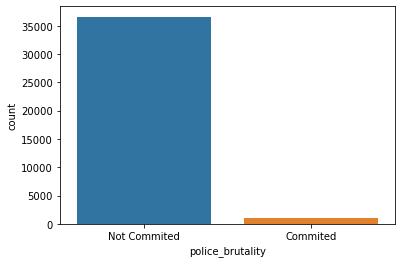

In [64]:
g = sns.countplot(temp_df['police_brutality'])
g.set_xticklabels(['Not Commited','Commited'])
plt.show()

In [70]:
# Experiment: Using a simple XGBClassifier without feature engineering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

y = temp_df['police_brutality']
x = temp_df.drop(['police_brutality','officerIdentifier'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

xgb_model = XGBClassifier().fit(x_train, y_train)

# Predict
xgb_y_predict = xgb_model.predict(x_test)

# Accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is: ', xgb_score)

[12:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is:  0.9710798620323693


In [72]:
# Lets use the classification report to measure the model's accuracy
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb_y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7320
           1       0.00      0.00      0.00       218

    accuracy                           0.97      7538
   macro avg       0.49      0.50      0.49      7538
weighted avg       0.94      0.97      0.96      7538



***Non-existent precision, recall and f1-score***
- Low Precision: Low accuracy of predictions for police brutality
- Low recall: Small fraction of high risk police officers correctly identified
- Low F1 score: Low percentage of positive predictions were correct